# Final Project

### Author: Joseph Wong

## Import the Packages

In [3]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!
# I had chatGPT break the packages into groups here

# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
from matplotlib.colors import ListedColormap
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# ============================================================
# Scikit-learn: Text feature extraction
# ============================================================
from sklearn.feature_extraction.text import CountVectorizer

# ============================================================
# Scikit-learn: Decision Trees
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# ============================================================
# Scikit-learn: Dimentionality Reduction
# ============================================================
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ============================================================
# Scikit-learn: Cross-Validation and Parameter Searches
# ============================================================

from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ============================================================
# Scikit-learn: Defining model pipelines
# ============================================================
from sklearn.pipeline import Pipeline

## Import the Data

In [4]:
file = "Dataset of health insurance portfolio.xlsx"
df_raw = pd.read_excel(file)
df_raw.head()

,ID,ID_policy,ID_insured,period,date_effect_insured,date_lapse_insured,date_effect_policy,date_lapse_policy,year_effect_insured,year_lapse_insured,...,C_H,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T,C_C
0,1_1,1,1,2017,1993-06-15,2017-12-20,1993-06-15,NaT,1993,2017.0,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
1,1_2,1,2,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,H1,99.0,85.0,18.0,52.0,59.0,4.0,14.0,96.0,C6
2,2_1,2,1,2017,1993-06-16,NaT,1993-06-16,NaT,1993,NaN,...,H6,100.0,94.0,26.0,11.0,85.0,7.0,1.0,100.0,C6
3,3_3,3,3,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3_5,3,5,2017,1993-06-15,NaT,1993-06-15,NaT,1993,NaN,...,H6,99.0,81.0,32.0,34.0,69.0,9.0,4.0,98.0,C6


In [39]:
mask = df_raw['period'] == 2019
cols = ['ID', 'ID_policy', 'ID_insured', 'period', 'type_policy', 'type_policy_dg', 'type_product', 'reimbursement', 'distribution_channel', 'gender', 'age', 'premium', 'cost_claims_year', 'n_medical_services', 'C_GI', 'C_II', 'C_IE_P', 'C_IE_S', 'C_IE_T', 'C_GE_P', 'C_GE_S', 'C_GE_T']
df = df_raw[mask][cols].copy()
df.head()

,ID,ID_policy,ID_insured,period,type_policy,type_policy_dg,type_product,reimbursement,distribution_channel,gender,...,cost_claims_year,n_medical_services,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T
152429,1_2,1,2,2019,I,I,S,No,A,F,...,84.7895,2,98.0,81.0,17.0,48.0,62.0,4.0,14.0,96.0
152430,2_1,2,1,2019,I,I,P,Yes,A,M,...,473.2961,19,100.0,93.0,25.0,10.0,86.0,7.0,1.0,100.0
152431,3_3,3,3,2019,I,I,S,No,A,F,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152432,3_5,3,5,2019,I,I,S,No,A,M,...,0.0000,0,98.0,79.0,30.0,31.0,72.0,9.0,4.0,98.0
152433,3_6,3,6,2019,I,I,S,No,A,M,...,1300.2033,50,32.0,5.0,100.0,76.0,2.0,83.0,51.0,19.0


In [17]:
file = "Descriptive of the variables.xlsx"
df_var_raw = pd.read_excel(file)
df_var = df_var_raw[df_var_raw['Variables'].isin(df.keys())].copy()

In [24]:
# code from ChatGPT to neatly display variable descriptions
for _, row in df_var.iterrows():
    print(f"Variable: {row['Variables']}")
    print(f"Description: {row['Description']}")
    print(f"Expanded description: {row['Expanded description']}")
    print("-" * 40)

Variable: ID
Description: Identification  code.
Expanded description: ID is a unique record identifier formed by concatenating ID_policy and ID_insured. This identifier is unique within each year of the dataset, which allows the same insured individual to be traced across the three years included in the study as long as they remain insured. In this way, it is possible to follow continuity, changes in coverage, or persistence/exit of a given insured person.
----------------------------------------
Variable: ID_policy
Description: (Generic)  Policy  identification  code.
Expanded description: Policy identification code. This code refers to the insurance contract code. Several insured individuals (e.g., family members under a collective policy) may share the same ID_policy
----------------------------------------
Variable: ID_insured
Description: Insured  identification  code.
Expanded description: ID_insured indicates the position of the insured individual within a given policy (ID_polic

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76282 entries, 152429 to 228710
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    76282 non-null  object 
 1   ID_policy             76282 non-null  int64  
 2   ID_insured            76282 non-null  int64  
 3   period                76282 non-null  int64  
 4   type_policy           76282 non-null  object 
 5   type_policy_dg        76282 non-null  object 
 6   type_product          76282 non-null  object 
 7   reimbursement         76282 non-null  object 
 8   distribution_channel  76282 non-null  object 
 9   gender                76282 non-null  object 
 10  age                   76282 non-null  int64  
 11  premium               76282 non-null  float64
 12  cost_claims_year      76282 non-null  float64
 13  n_medical_services    76282 non-null  int64  
 14  C_GI                  73225 non-null  float64
 15  C_II              

In [41]:
df.isna().sum()

ID                         0
ID_policy                  0
ID_insured                 0
period                     0
type_policy                0
type_policy_dg             0
type_product               0
reimbursement              0
distribution_channel       0
gender                     0
age                        0
premium                    0
cost_claims_year           0
n_medical_services         0
C_GI                    3057
C_II                    3057
C_IE_P                  3057
C_IE_S                  3057
C_IE_T                  3057
C_GE_P                  3057
C_GE_S                  3057
C_GE_T                  3057
dtype: int64

In [50]:
df[df['C_GI'].isna()] == df[df['C_II'].isna()]

,ID,ID_policy,ID_insured,period,type_policy,type_policy_dg,type_product,reimbursement,distribution_channel,gender,...,cost_claims_year,n_medical_services,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T
152431,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
152437,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
152442,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
152443,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
152444,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227781,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
228026,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
228198,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False
228202,True,True,True,True,True,True,True,True,True,True,...,True,True,False,False,False,False,False,False,False,False


In [52]:
# code from ChatGPT to find the rows that contain NaNs for a set of columns
cols = ['C_GI','C_II','C_IE_P','C_IE_S','C_IE_T','C_GE_P','C_GE_S','C_GE_T']
mask_all_nan = df[cols].isna().all(axis=1)
df[mask_all_nan]

,ID,ID_policy,ID_insured,period,type_policy,type_policy_dg,type_product,reimbursement,distribution_channel,gender,...,cost_claims_year,n_medical_services,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T
152431,3_3,3,3,2019,I,I,S,No,A,F,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152437,5_2,5,2,2019,I,I,P,Yes,I,F,...,635.8680,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152442,8_4,8,4,2019,I,I,S,No,I,F,...,371.4073,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152443,8_5,8,5,2019,I,I,S,No,I,M,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152444,8_6,8,6,2019,I,I,S,No,I,M,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227781,44662_1,44662,1,2019,I,SE,P,Yes,I,F,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228026,44783_1,44783,1,2019,I,I,S,No,D,F,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228198,44895_1,44895,1,2019,I,I,S,No,I,F,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228202,44897_1,44897,1,2019,I,I,S,No,D,M,...,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.describe()

,ID_policy,ID_insured,period,age,premium,cost_claims_year,n_medical_services,C_GI,C_II,C_IE_P,C_IE_S,C_IE_T,C_GE_P,C_GE_S,C_GE_T
count,76282.000000,76282.000000,76282.0,76282.000000,76282.000000,76282.000000,76282.000000,73225.000000,73225.000000,73225.000000,73225.000000,73225.000000,73225.000000,73225.000000,73225.000000
mean,23475.495569,3.185601,2019.0,44.017658,865.171973,570.585535,19.539669,81.766323,50.487484,50.486241,50.486227,50.487511,20.504759,28.368330,83.202704
std,13559.912723,9.854723,0.0,23.148350,572.047593,1590.329388,32.795155,21.275248,28.869613,28.869612,28.869590,28.869569,17.836242,28.832549,20.321569
min,1.000000,1.000000,2019.0,0.000000,34.190400,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,11468.000000,1.000000,2019.0,28.000000,507.271500,0.000000,0.000000,74.000000,25.000000,25.000000,25.000000,25.000000,7.000000,3.000000,75.000000
50%,23564.000000,2.000000,2019.0,44.000000,754.598600,176.412850,6.000000,91.000000,50.000000,50.000000,50.000000,50.000000,15.000000,17.000000,92.000000
75%,36106.750000,3.000000,2019.0,62.000000,1064.999850,525.183350,28.000000,97.000000,75.000000,75.000000,75.000000,75.000000,30.000000,50.000000,98.000000
max,45162.000000,250.000000,2019.0,99.000000,22318.048800,56790.098200,3094.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [78]:
num_cols = df.select_dtypes(include=[np.number]).keys()
cat_cols = df.select_dtypes(include=['object']).keys()

In [126]:
num_cols

Index(['ID_policy', 'ID_insured', 'period', 'age', 'premium',
       'cost_claims_year', 'n_medical_services', 'C_GI', 'C_II', 'C_IE_P',
       'C_IE_S', 'C_IE_T', 'C_GE_P', 'C_GE_S', 'C_GE_T'],
      dtype='object')

In [ ]:
for col in num_cols:
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

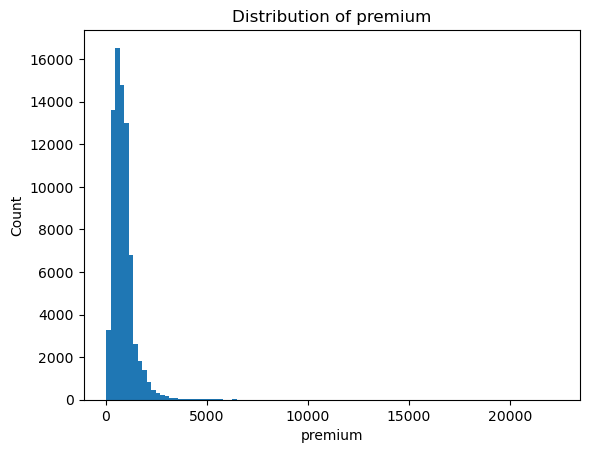

In [84]:
col = 'premium'
plt.hist(df[col], bins=100)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

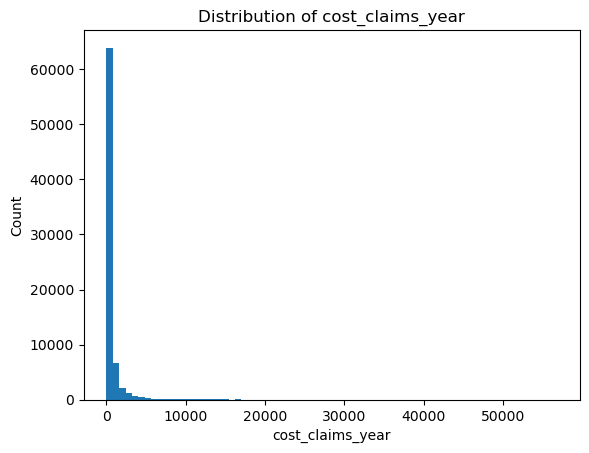

In [88]:
col = 'cost_claims_year'
plt.hist(df[col], bins=70)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

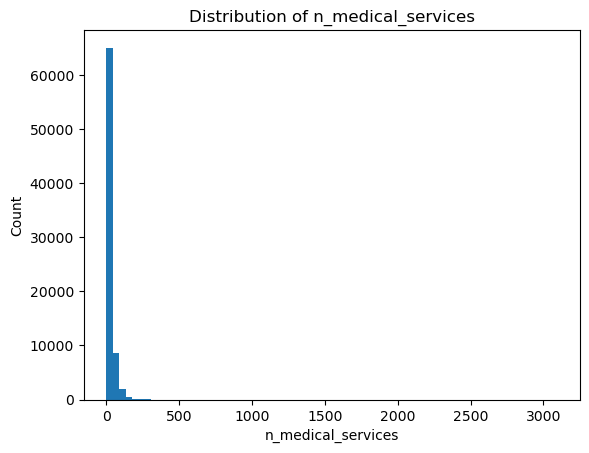

In [93]:
col = 'n_medical_services'
plt.hist(df[col], bins=70)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

In [110]:
cat_cols = cat_cols.drop('ID')

In [111]:
cat_cols

Index(['type_policy', 'type_policy_dg', 'type_product', 'reimbursement',
       'distribution_channel', 'gender'],
      dtype='object')

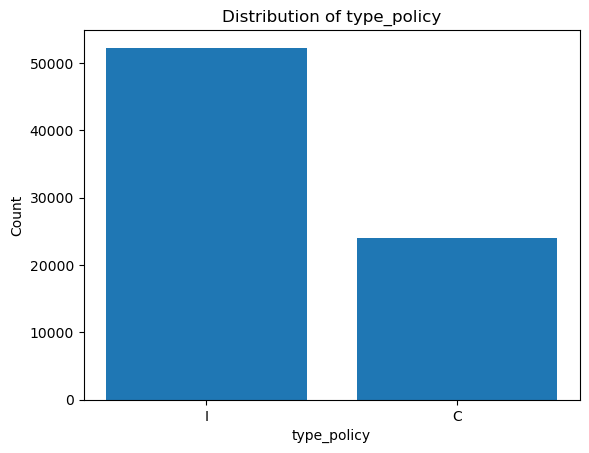

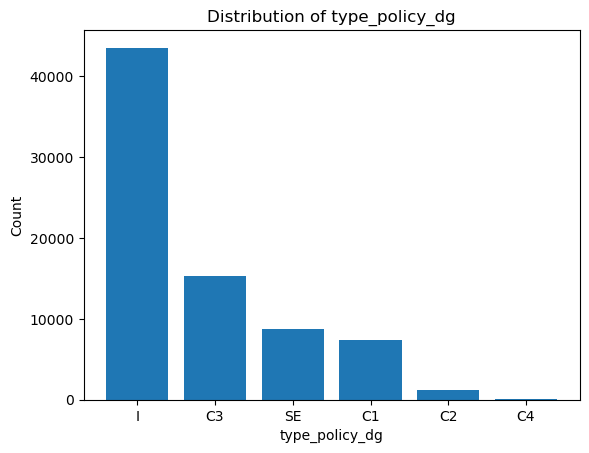

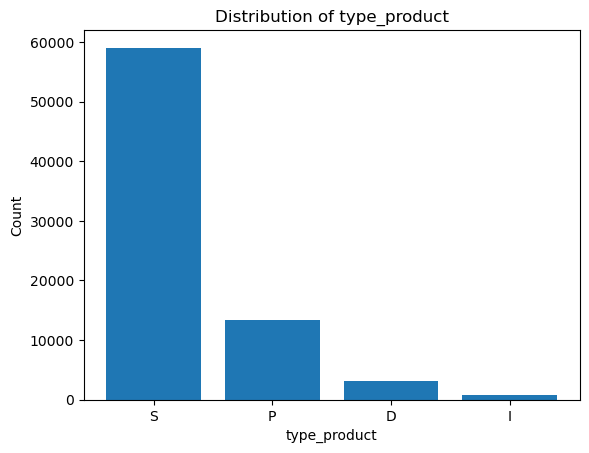

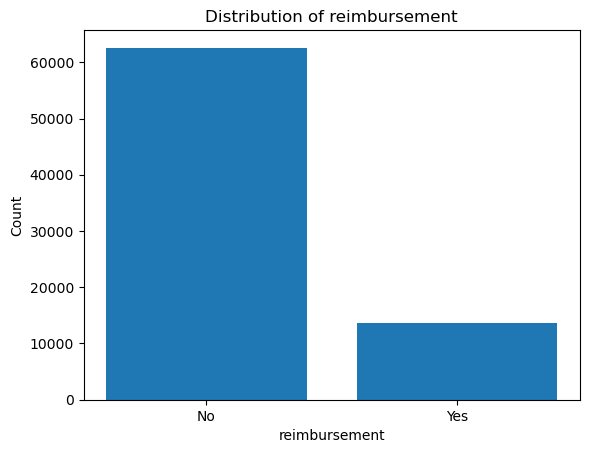

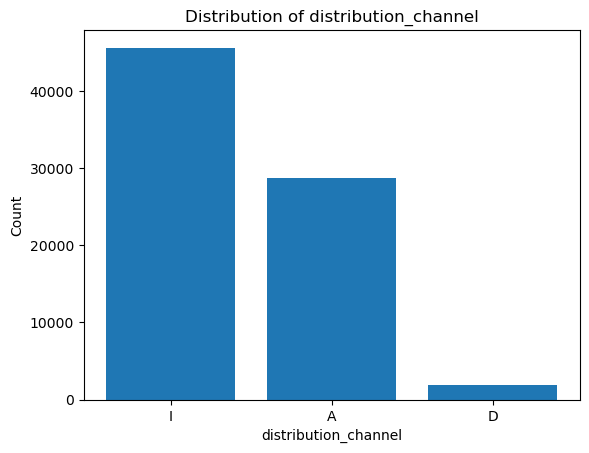

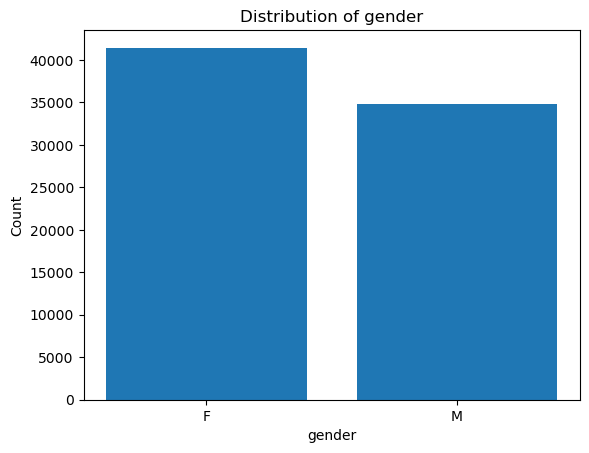

In [112]:
cat_cols = df.select_dtypes(include=['object']).keys()
for col in cat_cols:
    counts = df[col].value_counts()
    plt.bar(counts.index, counts.values)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [119]:
# One-hot encode the 'category' column
df_encoded = pd.get_dummies(df, columns=cat_cols, dtype=int)
df_encoded

,ID,ID_policy,ID_insured,period,age,premium,cost_claims_year,n_medical_services,C_GI,C_II,...,type_product_I,type_product_P,type_product_S,reimbursement_No,reimbursement_Yes,distribution_channel_A,distribution_channel_D,distribution_channel_I,gender_F,gender_M
152429,1_2,1,2,2019,82,2096.8913,84.7895,2,98.0,81.0,...,0,0,1,1,0,1,0,0,1,0
152430,2_1,2,1,2019,82,2194.7300,473.2961,19,100.0,93.0,...,0,1,0,0,1,1,0,0,0,1
152431,3_3,3,3,2019,90,2022.5784,0.0000,0,NaN,NaN,...,0,0,1,1,0,1,0,0,1,0
152432,3_5,3,5,2019,60,1443.8100,0.0000,0,98.0,79.0,...,0,0,1,1,0,1,0,0,0,1
152433,3_6,3,6,2019,53,1180.6908,1300.2033,50,32.0,5.0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228706,45161_1,45161,1,2019,37,627.4350,0.0000,0,89.0,47.0,...,0,0,1,1,0,1,0,0,1,0
228707,45162_1,45162,1,2019,43,522.9720,0.0000,0,85.0,40.0,...,0,0,1,1,0,1,0,0,0,1
228708,45162_2,45162,2,2019,38,522.9720,0.0000,0,85.0,40.0,...,0,0,1,1,0,1,0,0,1,0
228709,45162_3,45162,3,2019,10,486.8370,0.0000,0,85.0,40.0,...,0,0,1,1,0,1,0,0,0,1


In [122]:
cols = df_encoded.keys()
cols = cols.drop(['ID', 'ID_policy', 'ID_insured', 'period'])

In [125]:
cols

Index(['age', 'premium', 'cost_claims_year', 'n_medical_services', 'C_GI',
       'C_II', 'C_IE_P', 'C_IE_S', 'C_IE_T', 'C_GE_P', 'C_GE_S', 'C_GE_T',
       'type_policy_C', 'type_policy_I', 'type_policy_dg_C1',
       'type_policy_dg_C2', 'type_policy_dg_C3', 'type_policy_dg_C4',
       'type_policy_dg_I', 'type_policy_dg_SE', 'type_product_D',
       'type_product_I', 'type_product_P', 'type_product_S',
       'reimbursement_No', 'reimbursement_Yes', 'distribution_channel_A',
       'distribution_channel_D', 'distribution_channel_I', 'gender_F',
       'gender_M'],
      dtype='object')

In [ ]:
# Create a pairplot
sns.pairplot(df_encoded)

In [ ]:
cols = ['Life expectancy', 'Adult mortality', 'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Measles', 'BMI', 'Under-five deaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'Thinness 10-19 years', 'Thinness 5-9 years', 'Income composition of resources', 'Schooling']
sns.pairplot(df[cols], diag_kind="kde", plot_kws={"alpha": 0.5})
plt.show()